# **1.1 AKA Heirarchical Indexes**

In [ ]:
import pandas as pd

In [ ]:
carstocks = pd.read_csv("car_stocks.csv")

In [ ]:
titanic = pd.read_csv("titanic.csv")
titanic['age'] = titanic["age"].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic["fare"].replace(['?'], [None]).astype('float')

In [ ]:
s1 = titanic.groupby("sex")["age"].mean()

In [ ]:
s1

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

# **1.2 Grouping By Multiple Columns!**

In [ ]:
df = titanic.groupby(["pclass", "sex"]).mean()
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [ ]:
df.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

In [ ]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

In [ ]:
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [ ]:
titanic.groupby(["age", "sex"]).mean()

,,pclass,survived,sibsp,parch,fare
age,sex,,,,,
0.1667,female,3.0,1.0,1.0,2.0,20.5750
0.3333,male,3.0,0.0,0.0,2.0,14.4000
0.4167,male,3.0,1.0,0.0,1.0,8.5167
0.6667,male,2.0,1.0,1.0,1.0,14.5000
0.7500,female,3.0,1.0,2.0,1.0,19.2583
...,...,...,...,...,...,...
70.5000,male,3.0,0.0,0.0,0.0,7.7500
71.0000,male,1.0,0.0,0.0,0.0,42.0792
74.0000,male,3.0,0.0,0.0,0.0,7.7750


# **1.3 Creating Your Own MultiIndex**

In [ ]:
pops = pd.read_csv("state_pops.csv")

In [ ]:
pops

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


In [ ]:
pops.set_index("state")

,year,population
state,,
AL,2012,4817528.0
AL,2010,4785570.0
AL,2011,4801627.0
AL,2009,4757938.0
AL,2013,4833722.0
...,...,...
USA,2013,316128839.0
USA,2009,306771529.0
USA,2010,309326295.0


In [ ]:
pops.set_index("year")

,state,population
year,,
2012,AL,4817528.0
2010,AL,4785570.0
2011,AL,4801627.0
2009,AL,4757938.0
2013,AL,4833722.0
...,...,...
2013,USA,316128839.0
2009,USA,306771529.0
2010,USA,309326295.0


In [ ]:
pops.set_index(["state", "year"])

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [ ]:
pops.set_index(["year", "state"])

population
year state             
2012 AL       4817528.0
2010 AL       4785570.0
2011 AL       4801627.0
2009 AL       4757938.0
2013 AL       4833722.0
...                 ...
     USA    316128839.0
2009 USA    306771529.0
2010 USA    309326295.0
2011 USA    311582564.0
2012 USA    313873685.0

[1272 rows x 1 columns]

In [ ]:
pops.set_index(["state", "year"], inplace=True)

In [ ]:
pops

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

# **1.4 Sorting A MultiIndex**

In [ ]:
pops.sort_index()

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [ ]:
pops.sort_index(ascending=False)

population
state year            
WY    2013    582658.0
      2012    576626.0
      2011    567329.0
      2010    564222.0
      2009    559851.0
...                ...
AK    1994    603308.0
      1993    599434.0
      1992    588736.0
      1991    570193.0
      1990    553290.0

[1272 rows x 1 columns]

In [ ]:
pops.sort_index(level=1)

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [ ]:
pops.sort_index(level=[1,0],ascending=[False,True])

,,population
state,year,
AK,2013,735132.0
AL,2013,4833722.0
AR,2013,2959373.0
AZ,2013,6626624.0
CA,2013,38332521.0
...,...,...
VT,1990,564798.0
WA,1990,4903043.0
WI,1990,4904562.0


In [ ]:
pops.sort_index(inplace=True)

In [ ]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

# **1.5 loc[] with MultiIndexes**

In [ ]:
pops.loc["CA"]

,population
year,
1990,29959515.0
1991,30470736.0
1992,30974659.0
1993,31274928.0
1994,31484435.0
1995,31696582.0
1996,32018834.0
1997,32486010.0
1998,32987675.0


In [ ]:
pops.loc[["CA", "AK"]]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
      1995  31696582.0
      1996  32018834.0
      1997  32486010.0
      1998  32987675.0
      1999  33499204.0
      2000  33987977.0
      2001  34479458.0
      2002  34871843.0
      2003  35253159.0
      2004  35574576.0
      2005  35827943.0
      2006  36021202.0
      2007  36250311.0
      2008  36604337.0
      2009  36961229.0
      2010  37333601.0
      2011  37668681.0
      2012  37999878.0
      2013  38332521.0
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
      1996    608569.0
      1997    612968.0
      1998    619933.0
      1999    624779.0
      2000    627963.0
      2001    633714.0
      2002    642337.0
      2003    648414.0
      2004    659286.0
      2005    666946.0
      2006    675302.0
      2007    680300.0
      2008    687455.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0

In [ ]:
pops.loc["NM": "TX"]

population
state year            
NM    1990   1521574.0
      1991   1555305.0
      1992   1595442.0
      1993   1636453.0
      1994   1682398.0
...                ...
TX    2009  24801761.0
      2010  25245178.0
      2011  25640909.0
      2012  26060796.0
      2013  26448193.0

[312 rows x 1 columns]

In [ ]:
pops.loc[("MT",1992)]

population    825770.0
Name: (MT, 1992), dtype: float64

In [ ]:
pops.loc[("CA", 2013)]

population    38332521.0
Name: (CA, 2013), dtype: float64

In [ ]:
pops.loc[("AK", 1990):("AK",1995)]

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0

In [ ]:
pops.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1272 entries, ('AK', 1990) to ('WY', 2013)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  1262 non-null   float64
dtypes: float64(1)
memory usage: 48.0+ KB


In [ ]:
pops.loc[("AK", 2011):("AL",1993)]

population
state year            
AK    2011    723375.0
      2012    730307.0
      2013    735132.0
AL    1990   4050055.0
      1991   4099156.0
      1992   4154014.0
      1993   4214202.0

In [ ]:
# This won't work!
pops.loc[:,1990,:]

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
CO,1990,3307618.0
CT,1990,3291967.0
DC,1990,605321.0
DE,1990,669567.0


In [ ]:
titanic.loc[20, "name"]

'Beckwith, Mr. Richard Leonard'

In [ ]:
pops.loc["AL", 1990, :]

,,population
state,year,
AL,1990,4050055.0


In [ ]:
pops.loc[:, [1990,1991], :]

population
state year            
AK    1990    553290.0
      1991    570193.0
AL    1990   4050055.0
      1991   4099156.0
AR    1990   2356586.0
...                ...
WI    1991   4964343.0
WV    1990   1792548.0
      1991   1798735.0
WY    1990    453690.0
      1991    459260.0

[106 rows x 1 columns]

In [ ]:
pops.loc[slice(None), [1990,1991], :]

population
state year            
AK    1990    553290.0
      1991    570193.0
AL    1990   4050055.0
      1991   4099156.0
AR    1990   2356586.0
...                ...
WI    1991   4964343.0
WV    1990   1792548.0
      1991   1798735.0
WY    1990    453690.0
      1991    459260.0

[106 rows x 1 columns]

In [ ]:
pops.loc[:,2013,:]

,,population
state,year,
AK,2013,735132.0
AL,2013,4833722.0
AR,2013,2959373.0
AZ,2013,6626624.0
CA,2013,38332521.0
CO,2013,5268367.0
CT,2013,3596080.0
DC,2013,646449.0
DE,2013,925749.0


# **1.6 The .xs() method**

In [ ]:
pops.xs(2013, level="year").mean()

population    1.199760e+07
dtype: float64

In [ ]:
pops.loc[:,2013,:].mean()

population    1.199760e+07
dtype: float64

In [ ]:
pops.xs(2013, level=1)

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [ ]:
pops.index.levels

FrozenList([['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'USA', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]])

In [ ]:
pops.index.get_level_values(0)

Index(['AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK', 'AK',
       ...
       'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY', 'WY'],
      dtype='object', name='state', length=1272)

In [ ]:
pops.index.get_level_values(1)

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name='year', length=1272)

In [ ]:
pops.loc[:, [1990, 1992, 1994], :]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
AL    1990   4050055.0
      1992   4154014.0
...                ...
WV    1992   1806451.0
      1994   1820421.0
WY    1990    453690.0
      1992    466251.0
      1994    480283.0

[159 rows x 1 columns]

In [ ]:
even_years = pops.index.get_level_values(1) % 2 == 0

In [ ]:
len(even_years)

1272

In [ ]:
len(pops)

1272

In [ ]:
even_years

array([ True, False,  True, ..., False,  True, False])

In [ ]:
pops[even_years]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      1996    608569.0
      1998    619933.0
...                ...
WY    2004    509106.0
      2006    522667.0
      2008    546043.0
      2010    564222.0
      2012    576626.0

[636 rows x 1 columns]

In [ ]:
pops[pops["population"] % 2 == 0]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
      1995    604412.0
...                ...
WY    2004    509106.0
      2007    534876.0
      2010    564222.0
      2012    576626.0
      2013    582658.0

[645 rows x 1 columns]

In [ ]:
even_pops = pops["population"] % 2 == 0

In [ ]:
pops[even_years & even_pops]

population
state year            
AK    1990    553290.0
      1992    588736.0
      1994    603308.0
      2004    659286.0
      2006    675302.0
...                ...
WY    1990    453690.0
      2000    494300.0
      2004    509106.0
      2010    564222.0
      2012    576626.0

[304 rows x 1 columns]

In [ ]:
ends_with_a = pops.index.get_level_values(0).str[1] == "A"

In [ ]:
pops[ends_with_a]

population
state year            
CA    1990  29959515.0
      1991  30470736.0
      1992  30974659.0
      1993  31274928.0
      1994  31484435.0
...                ...
WA    2009   6667426.0
      2010   6742256.0
      2011   6821481.0
      2012   6895318.0
      2013   6971406.0

[192 rows x 1 columns]

# **1.8 Heirarchical Columns!**

In [ ]:
df = titanic.groupby(["pclass", "sex"]).mean()

In [ ]:
df.loc[(2, "male")]

survived     0.146199
age         30.815401
sibsp        0.327485
parch        0.192982
fare        19.904946
Name: (2, male), dtype: float64

In [ ]:
df

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [ ]:
df = titanic.groupby("sex").agg({
"age": ["min", "max", "mean"],
"fare": ["min", "max", "mean"],
"survived": ["mean"]
})

In [ ]:
df

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

In [ ]:
df.index

Index(['female', 'male'], dtype='object', name='sex')

In [ ]:
df.columns

MultiIndex([(     'age',  'min'),
            (     'age',  'max'),
            (     'age', 'mean'),
            (    'fare',  'min'),
            (    'fare',  'max'),
            (    'fare', 'mean'),
            ('survived', 'mean')],
           )

In [ ]:
df[("age", "mean")]

sex
female    28.687071
male      30.585233
Name: (age, mean), dtype: float64

In [ ]:
df["age"]["mean"]

sex
female    28.687071
male      30.585233
Name: mean, dtype: float64

In [ ]:
df

age                   fare                       survived
           min   max       mean   min       max       mean      mean
sex                                                                 
female  0.1667  76.0  28.687071  6.75  512.3292  46.198097  0.727468
male    0.3333  80.0  30.585233  0.00  512.3292  26.154601  0.190985

# **1.9 Stack() and Unstack()**

In [ ]:
pops

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [ ]:
unstacked_df = pops.unstack(level="state")

In [ ]:
unstacked_df.stack().unstack()

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   
1995    604412.0  4296800.0  2535399.0  4432499.0  31696582.0  3826653.0   
1996    608569.0  4331103.0  2572109.0  4586940.0  32018834.0  3919972.0   
1997    612968.0  4367935.0  2601091.0  4736990.0  32486010.0  4018293.0   
1998    619933.0  4404701.0  2626289.0  4883342.0  32987675.0  4116639.0   
1999    624779.0  4430141.0  2651860.0  5023823.0  33499204.0  4226018.0   
2000    627963.0  4452173.0  2678588.0  5160586.0  33987977.0  4326921.0   
2001    633714.0  4467634.0  2691571.0  5273477.0  34479458.0  4425687.0   
2002    642337.0  4480089.0  2705927.0  5396255.0  34871843.0  4490406.0   
2003    648414.0  4503491.0  2724816.0  5510364.0  35253159.0  4528732.0   
2004    659286.0  4530729.0  2749686.0  5652404.0  35574576.0  4575013.0   
2005    666946.0  4569805.0  2781097.0  5839077.0  35827943.0  4631888.0   
2006    675302.0  4628981.0  2821761.0  6029141.0  36021202.0  4720423.0   
2007    680300.0  4672840.0  2848650.0  6167681.0  36250311.0  4803868.0   
2008    687455.0  4718206.0  2874554.0  6280362.0  36604337.0  4889730.0   
2009    698895.0  4757938.0  2896843.0  6343154.0  36961229.0  4972195.0   
2010    713868.0  4785570.0  2922280.0  6408790.0  37333601.0  5048196.0   
2011    723375.0  4801627.0  2938506.0  6468796.0  37668681.0  5118400.0   
2012    730307.0  4817528.0  2949828.0  6551149.0  37999878.0  5189458.0   
2013    735132.0  4833722.0  2959373.0  6626624.0  38332521.0  5268367.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   
1995   3324144.0  580519.0  729735.0  14537875.0  ...  5326936.0  18958751.0   
1996   3336685.0  572379.0  740978.0  14853360.0  ...  5416643.0  19340342.0   
1997   3349348.0  567739.0  751487.0  15186304.0  ...  5499233.0  19740317.0   
1998   3365352.0  565232.0  763335.0  15486559.0  ...  5570045.0  20157531.0   
1999   3386401.0  570220.0  774990.0  15759421.0  ...  5638706.0  20558220.0   
2000   3411777.0  572046.0  786373.0  16047515.0  ...  5703719.0  20944499.0   
2001   3432835.0  574504.0  795699.0  16356966.0  ...  5750789.0  21319622.0   
2002   3458749.0  573158.0  806169.0  16689370.0  ...  5795918.0  21690325.0   
2003   3484336.0  568502.0  818003.0  17004085.0  ...  5847812.0  22030931.0   
2004   3496094.0  567754.0  830803.0  17415318.0  ...  5910809.0  22394023.0   
2005   3506956.0  567136.0  845150.0  17842038.0  ...  5991057.0  22778123.0   
2006   3517460.0  570681.0  859268.0  18166990.0  ...  6088766.0  23359580.0   
2007   3527270.0  574404.0  871749.0  18367842.0  ...  6175727.0  23831983.0   
2008   3545579.0  580236.0  883874.0  18527305.0  ...  6247411.0  24309039.0   
2009   3561807.0  592228.0  891730.0  18652644.0  ...  6306019.0  24801761.0   
2010   3579210.0  605125.0  899711.0  18846054.0  ...  6356683.0  25245178.0   
2011   3588948.0  619624.0  90798

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean()

pclass  sex   
1       female    37.037594
        male      41.029250
2       female    27.499191
        male      30.815401
3       female    22.185307
        male      25.962273
Name: age, dtype: float64

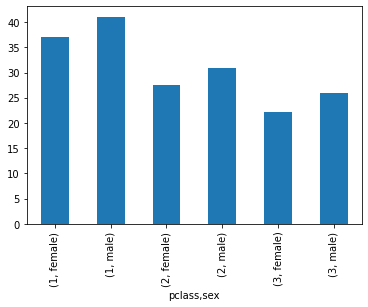

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean().plot(kind="bar")

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack()

sex,female,male
pclass,,
1,37.037594,41.029250
2,27.499191,30.815401
3,22.185307,25.962273


In [ ]:
titanic.groupby(["sex", "survived"])["age"].mean().unstack()

survived,0,1
sex,,
female,25.255208,29.815354
male,31.516412,26.977778


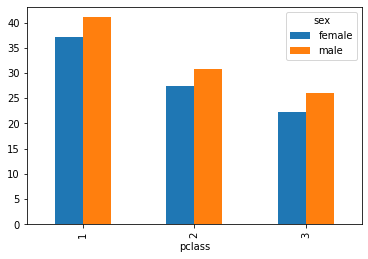

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack().plot(kind="bar")

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack(level="pclass")

pclass,1,2,3
sex,,,
female,37.037594,27.499191,22.185307
male,41.029250,30.815401,25.962273


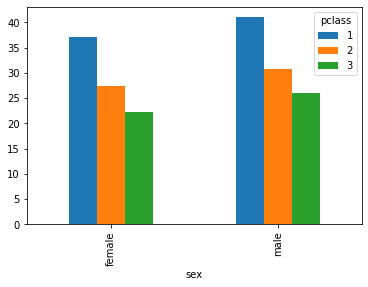

In [ ]:
titanic.groupby(["pclass", "sex"])["age"].mean().unstack(level="pclass").plot(kind="bar")

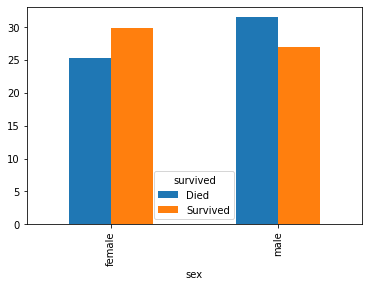

In [ ]:
df = titanic.groupby(["sex", "survived"])["age"].mean()
df.unstack().rename(columns={0: "Died", 1: "Survived"}).plot(kind="bar")

In [ ]:
pops.groupby(level=1).sum()

,population
year,
1990,499245628.0
1991,505961884.0
1992,513028462.0
1993,519837190.0
1994,526251652.0
1995,532556806.0
1996,538788582.0
1997,545293864.0
1998,551708232.0


In [ ]:
pops.groupby(level=0).min()

,population
state,
AK,553290.0
AL,4050055.0
AR,2356586.0
AZ,3684097.0
CA,29959515.0
CO,3307618.0
CT,3291967.0
DC,565232.0
DE,669567.0


In [ ]:
pops.groupby(level=[1,0]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]

In [ ]:
pops.index

MultiIndex([('AK', 1990),
            ('AK', 1991),
            ('AK', 1992),
            ('AK', 1993),
            ('AK', 1994),
            ('AK', 1995),
            ('AK', 1996),
            ('AK', 1997),
            ('AK', 1998),
            ('AK', 1999),
            ...
            ('WY', 2004),
            ('WY', 2005),
            ('WY', 2006),
            ('WY', 2007),
            ('WY', 2008),
            ('WY', 2009),
            ('WY', 2010),
            ('WY', 2011),
            ('WY', 2012),
            ('WY', 2013)],
           names=['state', 'year'], length=1272)

In [ ]:
pops.groupby(["year", "state"]).min()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1272 rows x 1 columns]